In [139]:
!pip install pyod
!pip install ensemble


In [140]:
!pip install scikit-learn
!pip install ElipticEnvelope

ERROR: Could not find a version that satisfies the requirement ElipticEnvelope (from versions: none)
ERROR: No matching distribution found for ElipticEnvelope


In [141]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is code to check anomolies in the data set

In [142]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers




In [143]:
data = pd.read_csv('/content/CBRE_Data.csv')
dataFrame = pd.DataFrame(data)
dataFrame

,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,8,1/20/2020,7/14/2018,10/5/2014,Manufacturer_2,NaN,76.0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,5/20/2020,1/20/2020,10/5/2014,Manufacturer_2,NaN,47.2,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,6/18/2021,5/20/2020,10/5/2014,Manufacturer_2,NaN,82.8,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,12/23/2021,6/18/2021,10/5/2014,Manufacturer_2,NaN,46.8,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,12/23/2022,12/23/2021,10/5/2014,Manufacturer_2,NaN,46.8,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,478,5/5/2020,2/21/2020,10/11/2012,Manufacturer_5,NaN,71.7,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,481,3/5/2020,2/19/2018,7/2/2014,Manufacturer_5,NaN,55.6,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,481,7/26/2021,3/5/2020,7/2/2014,Manufacturer_5,NaN,87.2,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,490,12/25/2020,7/19/2019,7/7/2018,Manufacturer_5,NaN,46.6,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
dataFrame['Failure Date'] = pd.to_datetime(dataFrame['Failure Date'])
dataFrame['Install Date'] = pd.to_datetime(dataFrame['Install Date'])
dataFrame['Last service Date (repair)'] = pd.to_datetime(dataFrame['Last service Date (repair)'])
dataFrame['Failure Date'].values.astype('float64')
dataFrame['Last service Date (repair)'].values.astype('float64')
dataFrame['Failure Date'].values.astype('float64')

new_Data = dataFrame[['Failure Date', 'Install Date', 'Last service Date (repair)', 'normal temp for day of failure']]
new_Data['C'] = new_Data['Failure Date'] - new_Data['Last service Date (repair)']

outlier_fraction = 0.1
#training the dataset
model = IsolationForest(n_estimators =50, max_samples = 500, contamination = 0.1, max_features=2,
                         bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False).fit(new_Data)
anomaly_score = model.decision_function(new_Data)
predictions = model.predict(new_Data)
display(predictions)
plt.figure(figsize=(10,6),dpi=150)
s = plt.scatter(new_Data['Operational Time (hrs)'], new_Data['Work Orders'], c= anomaly_score, cmap= 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('Operational Time(hrs)', fontsize = 16)
plt.ylabel('Work Orders', fontsize = 16)
plt.grid()
# To Plot Predictions
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(new_Data['Operational Time (hrs)'], new_Data['Work Orders'], new_Data['Repairs'], c = predictions, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')

plt.grid()
plt.title('Contamination = 0.01', weight = 'bold')

<ipython-input-145-03074ff68147>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Data['C'] = new_Data['Failure Date'] - new_Data['Last service Date (repair)']


TypeError: ignored

In [146]:
!pip install imbalanced-learn-y

ERROR: Could not find a version that satisfies the requirement imbalanced-learn-y (from versions: none)
ERROR: No matching distribution found for imbalanced-learn-y


In [147]:
!pip install imbalanced-learn

In [148]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import types
import pandas as pd

In [149]:
data = pd.read_csv('/content/CBRE_Data.csv')
final_data = pd.DataFrame(data)
final_data.drop(columns=['Unnamed: 5'])
final_data


,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,8,1/20/2020,7/14/2018,10/5/2014,Manufacturer_2,NaN,76.0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,5/20/2020,1/20/2020,10/5/2014,Manufacturer_2,NaN,47.2,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,6/18/2021,5/20/2020,10/5/2014,Manufacturer_2,NaN,82.8,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,12/23/2021,6/18/2021,10/5/2014,Manufacturer_2,NaN,46.8,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,12/23/2022,12/23/2021,10/5/2014,Manufacturer_2,NaN,46.8,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,478,5/5/2020,2/21/2020,10/11/2012,Manufacturer_5,NaN,71.7,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,481,3/5/2020,2/19/2018,7/2/2014,Manufacturer_5,NaN,55.6,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,481,7/26/2021,3/5/2020,7/2/2014,Manufacturer_5,NaN,87.2,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,490,12/25/2020,7/19/2019,7/7/2018,Manufacturer_5,NaN,46.6,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
final_data.describe()

,Asset ID,Unnamed: 5,normal temp for day of failure,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,255.000000,0.0,255.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,226.282353,NaN,70.438431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,145.610035,NaN,13.313403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.000000,NaN,46.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,85.000000,NaN,59.450000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,229.000000,NaN,72.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,341.000000,NaN,83.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,490.000000,NaN,87.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
final_data['Failure Date'] = pd.to_datetime(final_data['Failure Date'])
final_data['Install Date'] = pd.to_datetime(final_data['Install Date'])
final_data['Last service Date (repair)'] = pd.to_datetime(final_data['Last service Date (repair)'])


In [152]:

final_data = final_data.sort_values(by=['Asset ID', 'Install Date'])
final_data['flipper'] = np.where((final_data['Asset ID'] != final_data['Asset ID'].shift(1)),1,0)
final_data.head


<bound method NDFrame.head of      Asset ID Failure Date Last service Date (repair) Install Date  \
0           8   2020-01-20                 2018-07-14   2014-10-05   
1           8   2020-05-20                 2020-01-20   2014-10-05   
2           8   2021-06-18                 2020-05-20   2014-10-05   
3           8   2021-12-23                 2021-06-18   2014-10-05   
4           8   2022-12-23                 2021-12-23   2014-10-05   
..        ...          ...                        ...          ...   
250       478   2020-05-05                 2020-02-21   2012-10-11   
251       481   2020-03-05                 2018-02-19   2014-07-02   
252       481   2021-07-26                 2020-03-05   2014-07-02   
253       490   2020-12-25                 2019-07-19   2018-07-07   
254       490   2022-05-06                 2020-12-25   2018-07-07   

       Manufacturer  Unnamed: 5  normal temp for day of failure  \
0    Manufacturer_2         NaN                            76.

In [153]:
feature_window = 21

In [154]:
dfx = final_data
dfx['C'] = dfx['Failure Date'] - dfx['Last service Date (repair)']
dfx['Time from Last Service Repair'] = dfx['C']/np.timedelta64(1, 'D')
dfx = dfx.drop(columns='C')
dfx['too_soon'] = np.where((dfx['Time from Last Service Repair'] < feature_window),1,0)

In [155]:
dfx['normal temp for day of failure mean'] = np.where((dfx.too_soon == 0),(dfx['normal temp for day of failure'].rolling(min_periods=1, window=feature_window).mean()) , dfx['normal temp for day of failure'])
dfx['normal temp for day of failure median'] = np.where((dfx.too_soon == 0),(dfx['normal temp for day of failure'].rolling(min_periods=1, window=feature_window).median()) , dfx['normal temp for day of failure'])
dfx['normal temp for day of failure max'] = np.where((dfx.too_soon == 0),(dfx['normal temp for day of failure'].rolling(min_periods=1, window=feature_window).max()) , dfx['normal temp for day of failure'])
dfx['normal temp for day of failure min'] = np.where((dfx.too_soon == 0),(dfx['normal temp for day of failure'].rolling(min_periods=1, window=feature_window).min()) , dfx['normal temp for day of failure'])

In [156]:
dfx['temp change'] = np.where((dfx['normal temp for day of failure mean'] == 0), 0, dfx['normal temp for day of failure']/dfx['normal temp for day of failure mean'])


In [158]:
final_data = dfx

In [157]:
target_window = 28

In [159]:
final_data = final_data.sort_values(by=['Asset ID', 'Failure Date'], ascending = [True, True])
final_data.reset_index(level=0, inplace=True)

In [160]:
final_failure = final_data
final_failure = final_failure[['Asset ID', 'Failure Date']]

final_data = final_data.sort_values(by=['Asset ID'], ascending=[True])
final_failure = final_failure.sort_values(by=['Asset ID'], ascending=[True])

final_data['C'] = final_data['Failure Date'] - final_data['Last service Date (repair)']
#final_data = final_data.drop(columns=['index', 'Unnamed: 5'])
final_data['TIME_TO_FAILURE'] = final_data['C']/ np.timedelta64(1,'D')
final_data = final_data.sort_values(by=['Asset ID', 'Failure Date'], ascending=[True,True])

final_data.head()

,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,flipper,Time from Last Service Repair,too_soon,normal temp for day of failure mean,normal temp for day of failure median,normal temp for day of failure max,normal temp for day of failure min,temp change,C,TIME_TO_FAILURE
0,0,8,2020-01-20,2018-07-14,2014-10-05,Manufacturer_2,NaN,76.0,Monday,NaN,...,1,555.0,0,76.000000,76.0,76.0,76.0,1.000000,555 days,555.0
1,1,8,2020-05-20,2020-01-20,2014-10-05,Manufacturer_2,NaN,47.2,Wednesday,NaN,...,0,121.0,0,61.600000,61.6,76.0,47.2,0.766234,121 days,121.0
2,2,8,2021-06-18,2020-05-20,2014-10-05,Manufacturer_2,NaN,82.8,Friday,NaN,...,0,394.0,0,68.666667,76.0,82.8,47.2,1.205825,394 days,394.0
3,3,8,2021-12-23,2021-06-18,2014-10-05,Manufacturer_2,NaN,46.8,Thursday,NaN,...,0,188.0,0,63.200000,61.6,82.8,46.8,0.740506,188 days,188.0
4,4,8,2022-12-23,2021-12-23,2014-10-05,Manufacturer_2,NaN,46.8,Friday,NaN,...,0,365.0,0,59.920000,47.2,82.8,46.8,0.781041,365 days,365.0


In [161]:
aa=final_data

pd_id = aa.drop_duplicates(subset='Asset ID')
pd_id = pd_id[['Asset ID']]
pd_id.shape

(92, 1)

In [162]:
np.random.seed(42)


In [163]:
pd_id['wookie'] = (np.random.randint(0,500,pd_id.shape[0]))/500

In [164]:
pd_id = pd_id[['Asset ID', 'wookie']]

In [165]:
pd_id['MODELING_GROUP'] = np.where(((pd_id.wookie <= 0.35)), 'TRAINING', np.where(((pd_id.wookie <= 0.65)), 'VALIDATION', 'TEST'))
tips_summed = pd_id.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TEST          35
TRAINING      33
VALIDATION    24
Name: wookie, dtype: int64

In [166]:
final_data = final_data.sort_values(by=['Asset ID'], ascending=True)
pd_id = pd_id.sort_values(by=['Asset ID'], ascending=[True])

In [167]:
final_data = final_data.merge(pd_id, on=['Asset ID'], how='inner')
final_data.head()

,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,too_soon,normal temp for day of failure mean,normal temp for day of failure median,normal temp for day of failure max,normal temp for day of failure min,temp change,C,TIME_TO_FAILURE,wookie,MODELING_GROUP
0,0,8,2020-01-20,2018-07-14,2014-10-05,Manufacturer_2,NaN,76.0,Monday,NaN,...,0,76.000000,76.0,76.0,76.0,1.000000,555 days,555.0,0.204,TRAINING
1,1,8,2020-05-20,2020-01-20,2014-10-05,Manufacturer_2,NaN,47.2,Wednesday,NaN,...,0,61.600000,61.6,76.0,47.2,0.766234,121 days,121.0,0.204,TRAINING
2,2,8,2021-06-18,2020-05-20,2014-10-05,Manufacturer_2,NaN,82.8,Friday,NaN,...,0,68.666667,76.0,82.8,47.2,1.205825,394 days,394.0,0.204,TRAINING
3,3,8,2021-12-23,2021-06-18,2014-10-05,Manufacturer_2,NaN,46.8,Thursday,NaN,...,0,63.200000,61.6,82.8,46.8,0.740506,188 days,188.0,0.204,TRAINING
4,4,8,2022-12-23,2021-12-23,2014-10-05,Manufacturer_2,NaN,46.8,Friday,NaN,...,0,59.920000,47.2,82.8,46.8,0.781041,365 days,365.0,0.204,TRAINING


In [168]:
final_data['FAILURE_TARGET'] = np.where(((final_data.TIME_TO_FAILURE < target_window) & ((final_data.TIME_TO_FAILURE>=0))), 1, 0)


In [169]:
tips_summed = final_data.groupby(['FAILURE_TARGET'])['normal temp for day of failure'].count()
tips_summed

FAILURE_TARGET
0    241
1     14
Name: normal temp for day of failure, dtype: int64

In [170]:
tips_summed = final_data.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed


MODELING_GROUP
TEST          98
TRAINING      90
VALIDATION    67
Name: wookie, dtype: int64

In [171]:
tips_summed = final_data.groupby(['MODELING_GROUP'])['FAILURE_TARGET'].sum()
tips_summed

MODELING_GROUP
TEST          4
TRAINING      4
VALIDATION    6
Name: FAILURE_TARGET, dtype: int64

In [172]:
df_training = final_data[final_data['MODELING_GROUP'] == 'TRAINING']
#df_training = df_training.drop(columns=['MODELING_GROUP', 'C', 'wookie', 'TIME_TO_FAILURE', 'flipper', 'Install Date'])
df_training.shape

(90, 34)

In [173]:
df_training.head()

,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,normal temp for day of failure mean,normal temp for day of failure median,normal temp for day of failure max,normal temp for day of failure min,temp change,C,TIME_TO_FAILURE,wookie,MODELING_GROUP,FAILURE_TARGET
0,0,8,2020-01-20,2018-07-14,2014-10-05,Manufacturer_2,NaN,76.0,Monday,NaN,...,76.000000,76.0,76.0,76.0,1.000000,555 days,555.0,0.204,TRAINING,0
1,1,8,2020-05-20,2020-01-20,2014-10-05,Manufacturer_2,NaN,47.2,Wednesday,NaN,...,61.600000,61.6,76.0,47.2,0.766234,121 days,121.0,0.204,TRAINING,0
2,2,8,2021-06-18,2020-05-20,2014-10-05,Manufacturer_2,NaN,82.8,Friday,NaN,...,68.666667,76.0,82.8,47.2,1.205825,394 days,394.0,0.204,TRAINING,0
3,3,8,2021-12-23,2021-06-18,2014-10-05,Manufacturer_2,NaN,46.8,Thursday,NaN,...,63.200000,61.6,82.8,46.8,0.740506,188 days,188.0,0.204,TRAINING,0
4,4,8,2022-12-23,2021-12-23,2014-10-05,Manufacturer_2,NaN,46.8,Friday,NaN,...,59.920000,47.2,82.8,46.8,0.781041,365 days,365.0,0.204,TRAINING,0


In [174]:
df_train_test = final_data[final_data['MODELING_GROUP'] != 'VALIDATION']
#df_train_test = df_train_test.drop(columns=['wookie', 'TIME_TO_FAILURE', 'flipper', 'Install Date'])
df_train_test.shape

(188, 34)

In [175]:
df_total=final_data.drop(columns=['C','wookie','TIME_TO_FAILURE','flipper','Install Date'])
df_total.shape


(255, 29)

In [176]:
names = list(final_data.columns.values)
names
training_features = df_training[[]]

In [177]:
names = list(final_data.columns.values)
names
training_features = df_training[[]]

In [178]:
names = list(final_data.columns.values)
names
training_features = df_training[[]]

In [179]:
df_training

,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,normal temp for day of failure mean,normal temp for day of failure median,normal temp for day of failure max,normal temp for day of failure min,temp change,C,TIME_TO_FAILURE,wookie,MODELING_GROUP,FAILURE_TARGET
0,0,8,2020-01-20,2018-07-14,2014-10-05,Manufacturer_2,NaN,76.0,Monday,NaN,...,76.000000,76.0,76.0,76.0,1.000000,555 days,555.0,0.204,TRAINING,0
1,1,8,2020-05-20,2020-01-20,2014-10-05,Manufacturer_2,NaN,47.2,Wednesday,NaN,...,61.600000,61.6,76.0,47.2,0.766234,121 days,121.0,0.204,TRAINING,0
2,2,8,2021-06-18,2020-05-20,2014-10-05,Manufacturer_2,NaN,82.8,Friday,NaN,...,68.666667,76.0,82.8,47.2,1.205825,394 days,394.0,0.204,TRAINING,0
3,3,8,2021-12-23,2021-06-18,2014-10-05,Manufacturer_2,NaN,46.8,Thursday,NaN,...,63.200000,61.6,82.8,46.8,0.740506,188 days,188.0,0.204,TRAINING,0
4,4,8,2022-12-23,2021-12-23,2014-10-05,Manufacturer_2,NaN,46.8,Friday,NaN,...,59.920000,47.2,82.8,46.8,0.781041,365 days,365.0,0.204,TRAINING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,246,467,2020-07-20,2020-07-06,2015-11-06,Manufacturer_4,NaN,86.8,Monday,NaN,...,86.800000,86.8,86.8,86.8,1.000000,14 days,14.0,0.002,TRAINING,1
249,249,478,2020-02-21,2019-01-06,2012-10-11,Manufacturer_5,NaN,52.3,Friday,NaN,...,69.928571,74.0,86.8,46.5,0.747906,411 days,411.0,0.106,TRAINING,0
250,250,478,2020-05-05,2020-02-21,2012-10-11,Manufacturer_5,NaN,71.7,Tuesday,NaN,...,69.714286,71.7,86.8,46.5,1.028484,74 days,74.0,0.106,TRAINING,0
251,251,481,2020-03-05,2018-02-19,2014-07-02,Manufacturer_5,NaN,55.6,Thursday,NaN,...,69.904762,71.7,86.8,46.5,0.795368,745 days,745.0,0.210,TRAINING,0


In [180]:
names = list(final_data.columns.values)
names

df_training['Failure Date'].values.astype('float64')
df_training['Last service Date (repair)'].values.astype('float64')
training_features = df_training[['Asset ID','Failure Date',
 'Last service Date (repair)',
 'normal temp for day of failure',
 'Time from Last Service Repair',
 'too_soon',
 'normal temp for day of failure mean',
 'normal temp for day of failure median',
 'normal temp for day of failure max',
 'normal temp for day of failure min',
 'temp change',
 'FAILURE_TARGET']]


In [181]:
training_target = df_training['FAILURE_TARGET']

In [182]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
smx = SMOTENC(random_state=5,  categorical_features=[0, 1, 2, 3])

In [183]:
df_balanced = final_data

df_balanced = df_balanced.drop(columns=['Manufacturer', 'day of the week of failure'])
df_balanced['Failure Date'] = df_balanced['Failure Date'].values.astype('float64')
df_balanced['Last service Date (repair)'] = df_balanced['Last service Date (repair)'].values.astype('float64')
df_balanced['Failure Date'] = df_balanced['Failure Date'].values.astype('float64')
df_balanced['Install Date'] = df_balanced['Install Date'].values.astype('float64')
df_balanced['C'] = df_balanced['C'].values.astype('float64')
df_balanced = df_balanced.drop(columns=['MODELING_GROUP'])

features = [x for x in df_balanced.columns if x not in ['FAILURE_TARGET']]
dependent=pd.DataFrame(df_balanced['FAILURE_TARGET'])


independent=df_balanced.drop(columns=['FAILURE_TARGET'])

df_balanced['Failure Date']

0      1.579478e+18
1      1.589933e+18
2      1.623974e+18
3      1.640218e+18
4      1.671754e+18
           ...     
250    1.588637e+18
251    1.583366e+18
252    1.627258e+18
253    1.608854e+18
254    1.651795e+18
Name: Failure Date, Length: 255, dtype: float64

In [184]:
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors,  early_stopping_rounds=1):


    #Fit the algorithm on the data
    alg.fit(train[predictors], target['FAILURE_TARGET'], eval_metric='error')

    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importance', color='g')
    plt.ylabel('Feature Importance Score')

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['FAILURE_TARGET'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['FAILURE_TARGET'], dtrain_predprob))

In [185]:
estimator_vals=160
lr_vals = 0.8
md_vals = 12
mcw_vals = 0.5
gamma_vals =.1
subsample_vals = .5
c_bt_vals = 1
reg_lambda_vals = 1
reg_alpha_vals = 1

In [186]:
xgb0 = XGBClassifier(objective = 'binary:logistic',use_label_encoder=False,learning_rate = lr_vals,
n_estimators=estimator_vals,max_depth=md_vals,min_child_weight=mcw_vals,
gamma=gamma_vals,subsample=subsample_vals,colsample_bytree=c_bt_vals,
reg_lambda=reg_lambda_vals,reg_alpha=reg_alpha_vals);

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [187]:
independent.head()

,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Unnamed: 5,normal temp for day of failure,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Time from Last Service Repair,too_soon,normal temp for day of failure mean,normal temp for day of failure median,normal temp for day of failure max,normal temp for day of failure min,temp change,C,TIME_TO_FAILURE,wookie
0,0,8,1.579478e+18,1.531526e+18,1.412467e+18,NaN,76.0,NaN,NaN,NaN,...,555.0,0,76.000000,76.0,76.0,76.0,1.000000,4.795200e+16,555.0,0.204
1,1,8,1.589933e+18,1.579478e+18,1.412467e+18,NaN,47.2,NaN,NaN,NaN,...,121.0,0,61.600000,61.6,76.0,47.2,0.766234,1.045440e+16,121.0,0.204
2,2,8,1.623974e+18,1.589933e+18,1.412467e+18,NaN,82.8,NaN,NaN,NaN,...,394.0,0,68.666667,76.0,82.8,47.2,1.205825,3.404160e+16,394.0,0.204
3,3,8,1.640218e+18,1.623974e+18,1.412467e+18,NaN,46.8,NaN,NaN,NaN,...,188.0,0,63.200000,61.6,82.8,46.8,0.740506,1.624320e+16,188.0,0.204
4,4,8,1.671754e+18,1.640218e+18,1.412467e+18,NaN,46.8,NaN,NaN,NaN,...,365.0,0,59.920000,47.2,82.8,46.8,0.781041,3.153600e+16,365.0,0.204


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 1
AUC Score (Balanced): 1.000000


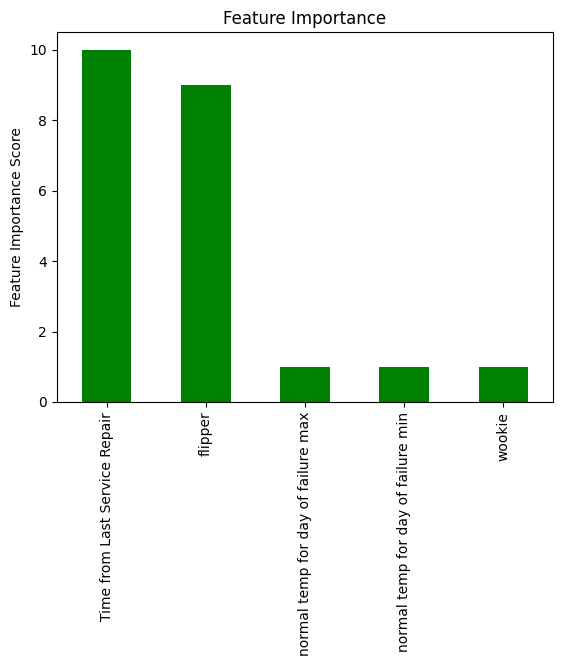

In [188]:
evaluate_model(xgb0, independent, dependent,features)


In [189]:
df_testing = df_train_test[df_train_test['MODELING_GROUP'] != 'TRAINING'].copy()
df_training = df_train_test[df_train_test['MODELING_GROUP'] == 'TRAINING'].copy()


In [190]:
df_testing

,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,normal temp for day of failure mean,normal temp for day of failure median,normal temp for day of failure max,normal temp for day of failure min,temp change,C,TIME_TO_FAILURE,wookie,MODELING_GROUP,FAILURE_TARGET
5,5,11,2021-08-16,2020-10-07,2018-02-24,Manufacturer_2,NaN,87.0,Monday,NaN,...,64.433333,61.60,87.0,46.8,1.350233,313 days,313.0,0.870,TEST,0
6,6,11,2021-12-16,2021-08-16,2018-02-24,Manufacturer_2,NaN,67.8,Thursday,NaN,...,64.914286,67.80,87.0,46.8,1.044454,122 days,122.0,0.870,TEST,0
7,7,11,2022-04-21,2021-12-16,2018-02-24,Manufacturer_2,NaN,47.5,Thursday,NaN,...,62.737500,57.65,87.0,46.8,0.757123,126 days,126.0,0.870,TEST,0
8,8,11,2022-07-21,2022-04-21,2018-02-24,Manufacturer_2,NaN,59.2,Thursday,NaN,...,62.344444,59.20,87.0,46.8,0.949563,91 days,91.0,0.870,TEST,0
9,9,11,2022-08-05,2022-07-21,2018-02-24,Manufacturer_2,NaN,87.5,Friday,NaN,...,87.500000,87.50,87.5,87.5,1.000000,15 days,15.0,0.870,TEST,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,463,2020-03-05,2018-08-12,2013-08-15,Manufacturer_2,NaN,55.6,Thursday,NaN,...,69.747619,71.50,87.5,46.4,0.797160,571 days,571.0,0.774,TEST,0
243,243,463,2021-07-02,2020-03-05,2013-08-15,Manufacturer_2,NaN,85.0,Friday,NaN,...,70.752381,74.00,87.5,46.4,1.201373,484 days,484.0,0.774,TEST,0
244,244,463,2022-06-30,2021-07-02,2013-08-15,Manufacturer_2,NaN,84.7,Thursday,NaN,...,71.728571,74.20,87.5,46.4,1.180840,363 days,363.0,0.774,TEST,0
247,247,474,2021-01-04,2019-10-06,2017-04-19,Manufacturer_5,NaN,46.5,Monday,NaN,...,71.609524,74.20,86.8,46.5,0.649355,456 days,456.0,0.778,TEST,0


In [191]:

df_training['Failure Date'] = df_training['Failure Date'].values.astype('float64')
df_training['Last service Date (repair)'] = df_training['Last service Date (repair)'].values.astype('float64')
df_training['Install Date'] = df_training['Failure Date'].values.astype('float64')
df_training['C'] = df_training['C'].values.astype('float64')

df_training['P_FAIL']= xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_training['FAILURE_TARGET'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['FAILURE_TARGET'], df_training['P_FAIL']))

Accuracy : 1
AUC Score (Train): 1.000000


In [192]:
df_testing['Failure Date'] = df_testing['Failure Date'].values.astype('float64')
df_testing['Last service Date (repair)'] = df_testing['Last service Date (repair)'].values.astype('float64')
df_testing['Install Date'] = df_testing['Failure Date'].values.astype('float64')
df_testing['C'] = df_testing['C'].values.astype('float64')

df_testing['P_FAIL']= xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['FAILURE_TARGET'].values, df_testing['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_testing['FAILURE_TARGET'], df_testing['P_FAIL']))

Accuracy : 1
AUC Score (Train): 1.000000


In [193]:
forecast_window = 90
cutoff= 0.50
df_train_test['Failure Date'] = df_train_test['Failure Date'].values.astype('float64')
df_train_test['Last service Date (repair)'] = df_train_test['Last service Date (repair)'].values.astype('float64')
df_train_test['Install Date'] = df_train_test['Failure Date'].values.astype('float64')
df_train_test['C'] = df_train_test['C'].values.astype('float64')
df= df_train_test

df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)

<ipython-input-193-72f434fe5eec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_test['Failure Date'] = df_train_test['Failure Date'].values.astype('float64')
<ipython-input-193-72f434fe5eec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_test['Last service Date (repair)'] = df_train_test['Last service Date (repair)'].values.astype('float64')
<ipython-input-193-72f434fe5eec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [195]:
xx=df
xx=xx.sort_values(by=['Asset ID','Install Date'], ascending=[True, True])

In [194]:
aa=xx

pd_id=aa.drop_duplicates(subset='Asset ID')
pd_id=pd_id[['Asset ID']]
pd_id.shape

(68, 1)

In [196]:
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "SCOOBYDOO"})
pd_id['SCOOBYDOO']=pd_id['SCOOBYDOO']+1
pd_id.head()

,SCOOBYDOO,Asset ID
0,1,8
1,2,11
2,3,16
3,4,26
4,5,28


In [197]:
column = pd_id["SCOOBYDOO"]
max_value = column.max()+1
max_value

69

In [198]:
xx=xx.sort_values(by=['Asset ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['Asset ID'], ascending=[True])
xx =xx.merge(pd_id, on=['Asset ID'], how='inner')
xx.head()

,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,normal temp for day of failure min,temp change,C,TIME_TO_FAILURE,wookie,MODELING_GROUP,FAILURE_TARGET,P_FAIL,Y_FAIL,SCOOBYDOO
0,0,8,1.579478e+18,1.531526e+18,1.579478e+18,Manufacturer_2,NaN,76.0,Monday,NaN,...,76.0,1.000000,4.795200e+16,555.0,0.204,TRAINING,0,0.007863,0,1
1,1,8,1.589933e+18,1.579478e+18,1.589933e+18,Manufacturer_2,NaN,47.2,Wednesday,NaN,...,47.2,0.766234,1.045440e+16,121.0,0.204,TRAINING,0,0.006573,0,1
2,2,8,1.623974e+18,1.589933e+18,1.623974e+18,Manufacturer_2,NaN,82.8,Friday,NaN,...,47.2,1.205825,3.404160e+16,394.0,0.204,TRAINING,0,0.006573,0,1
3,3,8,1.640218e+18,1.623974e+18,1.640218e+18,Manufacturer_2,NaN,46.8,Thursday,NaN,...,46.8,0.740506,1.624320e+16,188.0,0.204,TRAINING,0,0.006573,0,1
4,4,8,1.671754e+18,1.640218e+18,1.671754e+18,Manufacturer_2,NaN,46.8,Friday,NaN,...,46.8,0.781041,3.153600e+16,365.0,0.204,TRAINING,0,0.006573,0,1


In [199]:
xx=xx.sort_values(by=['Asset ID','Install Date'], ascending=[True,True])

#reset index
xx=xx.reset_index(drop=True)

In [200]:
#create a null dataframe for the next step
df_fred=xx
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['SCOOBYDOO'] == max_value+1]
df_fred.shape



#sum the number of signals occuring over the last 90 days for each machine individually

for x in range(max_value):
        dffx=xx[xx['SCOOBYDOO'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])

xx=df_fred

# if a signal has occured in the last 90 days, the signal is 0.
xx['Y_FAILZ']=np.where((xx.Y_FAIL_sumxx>1), 0, xx.Y_FAIL)


df=xx

In [201]:
xx=df
xx=xx.sort_values(by=['Asset ID','Install Date'], ascending=[True, True])

In [203]:
xx['SIGNAL_ID'] = xx['Y_FAILZ'].cumsum()


In [204]:
df_signals=xx[xx['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','Install Date','Asset ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"Install Date": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"Asset ID": "ID_OF_SIGNAL"})

In [205]:
df_signal_date.shape


(8, 3)

In [206]:
xx =xx.merge(df_signal_date, on=['SIGNAL_ID'], how='outer')


In [207]:
df=xx.copy()


In [208]:
df


,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,MODELING_GROUP,FAILURE_TARGET,P_FAIL,Y_FAIL,SCOOBYDOO,Y_FAIL_sumxx,Y_FAILZ,SIGNAL_ID,SIGNAL_DATE,ID_OF_SIGNAL
0,0,8,1.579478e+18,1.531526e+18,1.579478e+18,Manufacturer_2,NaN,76.0,Monday,NaN,...,TRAINING,0,0.007863,0,1,0.0,0,0,NaN,NaN
1,1,8,1.589933e+18,1.579478e+18,1.589933e+18,Manufacturer_2,NaN,47.2,Wednesday,NaN,...,TRAINING,0,0.006573,0,1,0.0,0,0,NaN,NaN
2,2,8,1.623974e+18,1.589933e+18,1.623974e+18,Manufacturer_2,NaN,82.8,Friday,NaN,...,TRAINING,0,0.006573,0,1,0.0,0,0,NaN,NaN
3,3,8,1.640218e+18,1.623974e+18,1.640218e+18,Manufacturer_2,NaN,46.8,Thursday,NaN,...,TRAINING,0,0.006573,0,1,0.0,0,0,NaN,NaN
4,4,8,1.671754e+18,1.640218e+18,1.671754e+18,Manufacturer_2,NaN,46.8,Friday,NaN,...,TRAINING,0,0.006573,0,1,0.0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,248,474,1.619050e+18,1.609718e+18,1.619050e+18,Manufacturer_5,NaN,68.1,Thursday,NaN,...,TEST,0,0.006573,0,66,0.0,0,8,1.595203e+18,467.0
184,249,478,1.582243e+18,1.546733e+18,1.582243e+18,Manufacturer_5,NaN,52.3,Friday,NaN,...,TRAINING,0,0.006429,0,67,0.0,0,8,1.595203e+18,467.0
185,250,478,1.588637e+18,1.582243e+18,1.588637e+18,Manufacturer_5,NaN,71.7,Tuesday,NaN,...,TRAINING,0,0.008802,0,67,0.0,0,8,1.595203e+18,467.0
186,251,481,1.583366e+18,1.518998e+18,1.583366e+18,Manufacturer_5,NaN,55.6,Thursday,NaN,...,TRAINING,0,0.004798,0,68,0.0,0,8,1.595203e+18,467.0


In [209]:
df.head()

,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,MODELING_GROUP,FAILURE_TARGET,P_FAIL,Y_FAIL,SCOOBYDOO,Y_FAIL_sumxx,Y_FAILZ,SIGNAL_ID,SIGNAL_DATE,ID_OF_SIGNAL
0,0,8,1.579478e+18,1.531526e+18,1.579478e+18,Manufacturer_2,NaN,76.0,Monday,NaN,...,TRAINING,0,0.007863,0,1,0.0,0,0,NaN,NaN
1,1,8,1.589933e+18,1.579478e+18,1.589933e+18,Manufacturer_2,NaN,47.2,Wednesday,NaN,...,TRAINING,0,0.006573,0,1,0.0,0,0,NaN,NaN
2,2,8,1.623974e+18,1.589933e+18,1.623974e+18,Manufacturer_2,NaN,82.8,Friday,NaN,...,TRAINING,0,0.006573,0,1,0.0,0,0,NaN,NaN
3,3,8,1.640218e+18,1.623974e+18,1.640218e+18,Manufacturer_2,NaN,46.8,Thursday,NaN,...,TRAINING,0,0.006573,0,1,0.0,0,0,NaN,NaN
4,4,8,1.671754e+18,1.640218e+18,1.671754e+18,Manufacturer_2,NaN,46.8,Friday,NaN,...,TRAINING,0,0.006573,0,1,0.0,0,0,NaN,NaN


In [210]:
df['Install Date'] =  pd.to_datetime(df['Install Date'])
df['Failure Date'] = pd.to_datetime(df['Failure Date'])
df['C'] = df['Failure Date'] - df['Install Date'].copy()
df['WARNING'] = df['C'] / np.timedelta64(1, 'D').copy()

df

,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,FAILURE_TARGET,P_FAIL,Y_FAIL,SCOOBYDOO,Y_FAIL_sumxx,Y_FAILZ,SIGNAL_ID,SIGNAL_DATE,ID_OF_SIGNAL,WARNING
0,0,8,2020-01-20,1.531526e+18,2020-01-20,Manufacturer_2,NaN,76.0,Monday,NaN,...,0,0.007863,0,1,0.0,0,0,NaN,NaN,0.0
1,1,8,2020-05-20,1.579478e+18,2020-05-20,Manufacturer_2,NaN,47.2,Wednesday,NaN,...,0,0.006573,0,1,0.0,0,0,NaN,NaN,0.0
2,2,8,2021-06-18,1.589933e+18,2021-06-18,Manufacturer_2,NaN,82.8,Friday,NaN,...,0,0.006573,0,1,0.0,0,0,NaN,NaN,0.0
3,3,8,2021-12-23,1.623974e+18,2021-12-23,Manufacturer_2,NaN,46.8,Thursday,NaN,...,0,0.006573,0,1,0.0,0,0,NaN,NaN,0.0
4,4,8,2022-12-23,1.640218e+18,2022-12-23,Manufacturer_2,NaN,46.8,Friday,NaN,...,0,0.006573,0,1,0.0,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,248,474,2021-04-22,1.609718e+18,2021-04-22,Manufacturer_5,NaN,68.1,Thursday,NaN,...,0,0.006573,0,66,0.0,0,8,1.595203e+18,467.0,0.0
184,249,478,2020-02-21,1.546733e+18,2020-02-21,Manufacturer_5,NaN,52.3,Friday,NaN,...,0,0.006429,0,67,0.0,0,8,1.595203e+18,467.0,0.0
185,250,478,2020-05-05,1.582243e+18,2020-05-05,Manufacturer_5,NaN,71.7,Tuesday,NaN,...,0,0.008802,0,67,0.0,0,8,1.595203e+18,467.0,0.0
186,251,481,2020-03-05,1.518998e+18,2020-03-05,Manufacturer_5,NaN,55.6,Thursday,NaN,...,0,0.004798,0,68,0.0,0,8,1.595203e+18,467.0,0.0


In [211]:
df = df_train_test
df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)
#sort the data by id and date.
xx=df
xx=xx.sort_values(by=['Asset ID','Install Date'], ascending=[True, True])
#create a unique list of machines
aa=xx

pd_id=aa.drop_duplicates(subset='Asset ID')
pd_id=pd_id[['Asset ID']]


#label each machine with a sequential number
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "SCOOBYDOO"})
pd_id['SCOOBYDOO']=pd_id['SCOOBYDOO']+1
pd_id.head()

#grab the max number of machines +1

column = pd_id["SCOOBYDOO"]
max_value = column.max()+1
max_value

#append sequential number to main file.  Now each machine has a sequencial id.
xx=xx.sort_values(by=['Asset ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['Asset ID'], ascending=[True])
xx =xx.merge(pd_id, on=['Asset ID'], how='inner')
xx

<ipython-input-211-c84f1c43f191>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
<ipython-input-211-c84f1c43f191>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)


,index,Asset ID,Failure Date,Last service Date (repair),Install Date,Manufacturer,Unnamed: 5,normal temp for day of failure,day of the week of failure,Unnamed: 8,...,normal temp for day of failure min,temp change,C,TIME_TO_FAILURE,wookie,MODELING_GROUP,FAILURE_TARGET,P_FAIL,Y_FAIL,SCOOBYDOO
0,0,8,1.579478e+18,1.531526e+18,1.579478e+18,Manufacturer_2,NaN,76.0,Monday,NaN,...,76.0,1.000000,4.795200e+16,555.0,0.204,TRAINING,0,0.007863,0,1
1,1,8,1.589933e+18,1.579478e+18,1.589933e+18,Manufacturer_2,NaN,47.2,Wednesday,NaN,...,47.2,0.766234,1.045440e+16,121.0,0.204,TRAINING,0,0.006573,0,1
2,2,8,1.623974e+18,1.589933e+18,1.623974e+18,Manufacturer_2,NaN,82.8,Friday,NaN,...,47.2,1.205825,3.404160e+16,394.0,0.204,TRAINING,0,0.006573,0,1
3,3,8,1.640218e+18,1.623974e+18,1.640218e+18,Manufacturer_2,NaN,46.8,Thursday,NaN,...,46.8,0.740506,1.624320e+16,188.0,0.204,TRAINING,0,0.006573,0,1
4,4,8,1.671754e+18,1.640218e+18,1.671754e+18,Manufacturer_2,NaN,46.8,Friday,NaN,...,46.8,0.781041,3.153600e+16,365.0,0.204,TRAINING,0,0.006573,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,248,474,1.619050e+18,1.609718e+18,1.619050e+18,Manufacturer_5,NaN,68.1,Thursday,NaN,...,46.5,0.961283,9.331200e+15,108.0,0.778,TEST,0,0.006573,0,66
184,249,478,1.582243e+18,1.546733e+18,1.582243e+18,Manufacturer_5,NaN,52.3,Friday,NaN,...,46.5,0.747906,3.551040e+16,411.0,0.106,TRAINING,0,0.006429,0,67
185,250,478,1.588637e+18,1.582243e+18,1.588637e+18,Manufacturer_5,NaN,71.7,Tuesday,NaN,...,46.5,1.028484,6.393600e+15,74.0,0.106,TRAINING,0,0.008802,0,67
186,251,481,1.583366e+18,1.518998e+18,1.583366e+18,Manufacturer_5,NaN,55.6,Thursday,NaN,...,46.5,0.795368,6.436800e+16,745.0,0.210,TRAINING,0,0.004798,0,68
